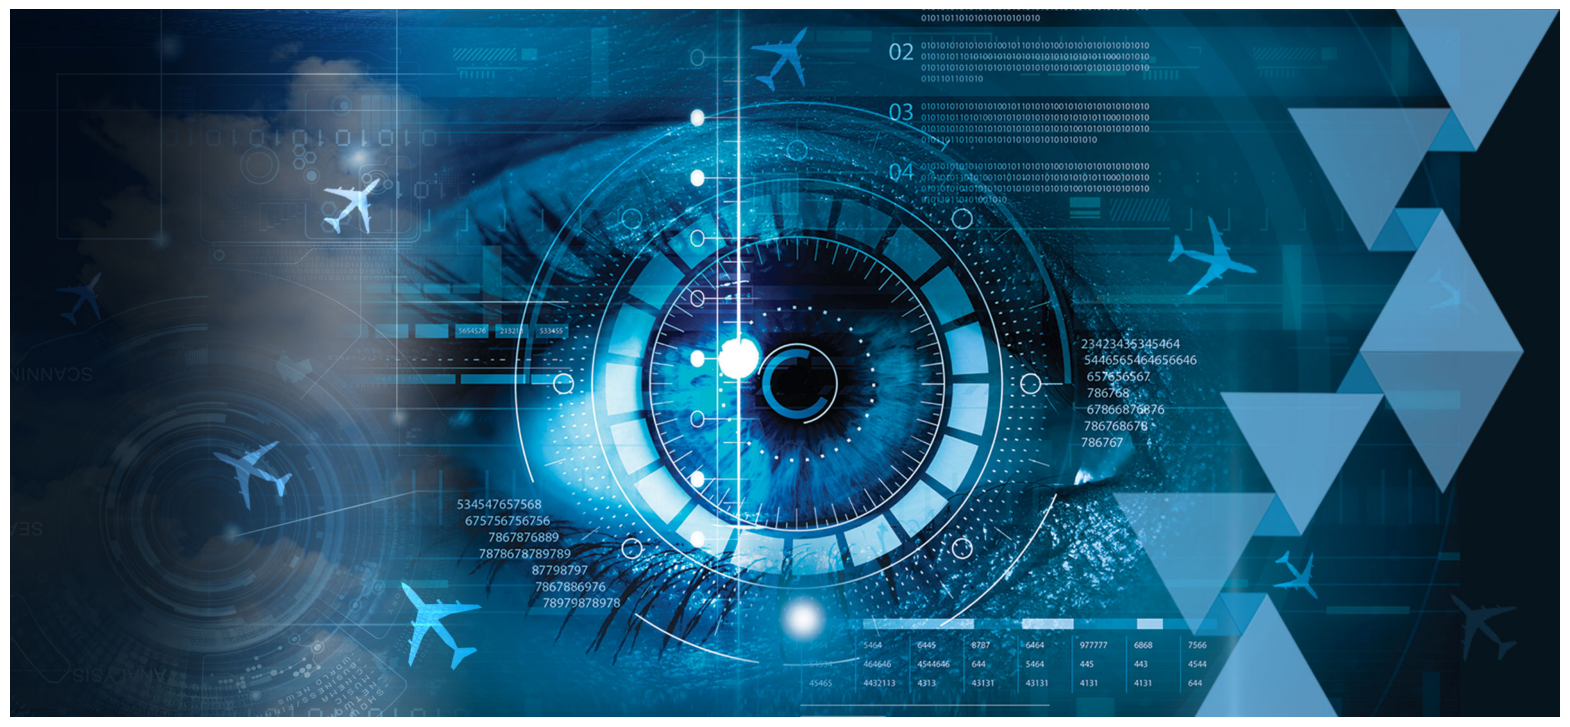

In [6]:
Imagen("IMAGENES\IA_0.jpg", (20,10))

# <h1 align=center> **CONECTIVIDAD A√âREA ARGENTINA** </h1>
-----------------------------------------------------

# <h1 align=center> **MLOPS - PREDICCIONES** </h1>
-------------------------------------------

# **1.- INSTALACI√ìN DE LIBRERIAS Y DEPENDENCIAS.**

#### LIBRERIAS Y DEPENDENCIAS.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.tsa.stattools as ts
from joblib import Parallel, delayed
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from funciones import *

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **2.- APERTURA DE LOS DATASETS Y VISUALIZACI√ìN.**

#### A.- APERTURA.


In [8]:
archivo = r'base_microdatos.csv'
DATABASEGENERAL = pd.read_csv(archivo)
DATABASEGENERAL.head(5)

fecha clasificacion_vuelo clase_vuelo              aerolinea  \
0  2017-01-01            Cabotaje  No Regular    Andes L√≠neas A√©reas   
1  2017-01-01            Cabotaje  No Regular    Andes L√≠neas A√©reas   
2  2017-01-01            Cabotaje  No Regular    Andes L√≠neas A√©reas   
3  2017-01-01            Cabotaje     Regular  Aerol√≠neas Argentinas   
4  2017-01-01            Cabotaje     Regular  Aerol√≠neas Argentinas   

  origen_oaci                          origen_aeropuerto  \
0        SAAV                  Aeropuerto de Sauce Viejo   
1        SASA    Aeropuerto Int. Mart√≠n Miguel de G√ºemes   
2        SAZS       Aeropuerto Int. Tte. Luis Candelaria   
3        SAAR  Aeropuerto Int. de Rosario Islas Malvinas   
4        SAAR  Aeropuerto Int. de Rosario Islas Malvinas   

          origen_localidad origen_provincia origen_pais origen_continente  \
0                 Santa Fe         Santa Fe   Argentina   Am√©rica del Sur   
1                    Salta            Salta   Argentina   Am√©rica del Sur   
2  San Carlos de Bariloche        R√≠o Negro   Argentina   Am√©rica del Sur   
3                  Rosario         Santa Fe   Argentina   Am√©rica del Sur   
4                  Rosario         Santa Fe   Argentina   Am√©rica del Sur   

  destino_oaci                            destino_aeropuerto  \
0         SAZS          Aeropuerto Int. Tte. Luis Candelaria   
1         SASJ          Aeropuerto Int. Gdor. Horacio Guzm√°n   
2         SAAV                     Aeropuerto de Sauce Viejo   
3         SACO  Aeropuerto Int. Ingeniero Ambrosio Taravella   
4         SAEZ            Aeropuerto Int. Ministro Pistarini   

         destino_localidad destino_provincia destino_pais destino_continente  \
0  San Carlos de Bariloche         R√≠o Negro    Argentina    Am√©rica del Sur   
1    San Salvador de Jujuy             Jujuy    Argentina    Am√©rica del Sur   
2                 Santa Fe          Santa Fe    Argentina    Am√©rica del Sur   
3                  C√≥rdoba           C√≥rdoba    Argentina    Am√©rica del Sur   
4                   Ezeiza      Buenos Aires    Argentina    Am√©rica del Sur   

   pasajeros  asientos  vuelos  
0         85        85       1  
1         23        83       1  
2         78        83       1  
3         48       128       1  
4         90       128       1

In [3]:
DATABASEGENERAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781648 entries, 0 to 781647
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   fecha                781648 non-null  object
 1   clasificacion_vuelo  781648 non-null  object
 2   clase_vuelo          781648 non-null  object
 3   aerolinea            781648 non-null  object
 4   origen_oaci          781648 non-null  object
 5   origen_aeropuerto    781648 non-null  object
 6   origen_localidad     781648 non-null  object
 7   origen_provincia     618482 non-null  object
 8   origen_pais          781648 non-null  object
 9   origen_continente    781647 non-null  object
 10  destino_oaci         781648 non-null  object
 11  destino_aeropuerto   781648 non-null  object
 12  destino_localidad    781648 non-null  object
 13  destino_provincia    617411 non-null  object
 14  destino_pais         781648 non-null  object
 15  destino_continente   781648 non-nu

#### B.- VISUALIZACI√ìN DE LA DECOMPOSICI√ìN DE COLUMNAS CLAVES.


In [4]:
DATABASEGENERAL['fecha'] = pd.to_datetime(DATABASEGENERAL['fecha'])
DATABASEGENERAL.set_index('fecha', inplace=True)
monthly_data = DATABASEGENERAL.resample('M').sum()

*I.- Pasajeros.*

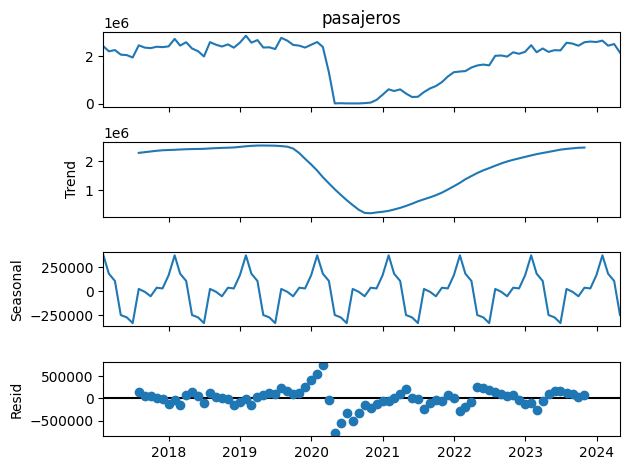

In [5]:
decomposition = seasonal_decompose(monthly_data['pasajeros'], model='additive')
decomposition.plot()
plt.show()

*II.- Vuelos.*

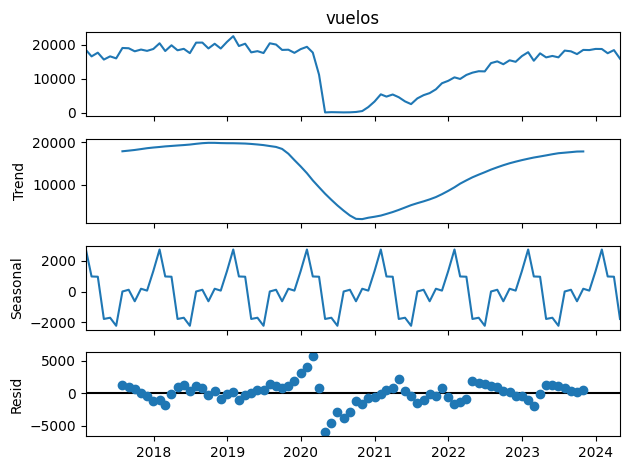

In [6]:
decomposition = seasonal_decompose(monthly_data['vuelos'], model='additive')
decomposition.plot()
plt.show()

De ambas decomposiciones se observa claramente la ca√≠da significativa en la tendencia alrededor del a√±o 2020, coincidiendo con las restricciones de vuelos por la pandemia, y una recuperaci√≥n que se inicia en 2021 y se estabiliza en 2022.</p>

La descomposici√≥n muestra:</p>

- Serie Original: La evoluci√≥n de los pasajeros mensuales.</p>
- Tendencia (Trend): El cambio a largo plazo en los datos, donde se destaca la ca√≠da durante la pandemia y la posterior recuperaci√≥n.</p>
- Estacionalidad (Seasonal): Fluctuaciones peri√≥dicas, que parecen tener un patr√≥n anual, con picos y valles correspondientes a temporadas de mayor y menor actividad.</p>
- Residuos (Resid): Las variaciones no explicadas por la tendencia o la estacionalidad, que pueden considerarse como ruido.</p>

# **3.- MODELOS DE MACHINE LEARNING OPERATIONS.**

#### A.- REGRESI√ìN LINEAL.

In [10]:
predicted_ocupacion, predicted_vuelos = regresion_lineal(DATABASEGENERAL)
print(f"Predicci√≥n para el 31 de diciembre de 2024:")
print(f"Ocupaci√≥n: {predicted_ocupacion}")
print(f"Crecimiento de vuelos: {predicted_vuelos}")


Ocupaci√≥n - R2: 0.008196684760576889, MSE: 33542.8277087737
Crecimiento de vuelos - R2: 0.00023483107370092515, MSE: 1.6350843838202638
Predicci√≥n para el 31 de diciembre de 2024:
Ocupaci√≥n: [225.88916462]
Crecimiento de vuelos: [1.75509583]


c:\Users\LENOVO\Downloads\CONECTIVIDAD A√âREA\funciones.py:364: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATABASEGENERAL['fecha'] = pd.to_datetime(DATABASEGENERAL['fecha'])
c:\Users\LENOVO\Downloads\CONECTIVIDAD A√âREA\funciones.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATABASEGENERAL['dias'] = (DATABASEGENERAL['fecha'] - DATABASEGENERAL['fecha'].min()).dt.days
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site

Los resultados del modelo de regresi√≥n lineal indican que la capacidad predictiva del modelo es muy baja para todas las variables:</p>

*Ocupaci√≥n:*</p>

- R2: 0.008: Esto indica que el modelo apenas explica el 0.8% de la variabilidad en los datos de ocupaci√≥n. Un R2 tan bajo sugiere que el modelo no es adecuado para predecir la ocupaci√≥n.</p>
- MSE: 33542.83: El error cuadr√°tico medio (MSE) es bastante alto, lo que implica que las predicciones est√°n, en promedio, muy alejadas de los valores reales.</p>
- Predicci√≥n para el 31 de diciembre de 2024: [225.89]: Esta predicci√≥n parece inusualmente alta para un factor de ocupaci√≥n, lo que refuerza la idea de que el modelo no es preciso.</p>

*Crecimiento de vuelos:*</p>

- R2: 0.0002: Este valor es extremadamente bajo, lo que indica que el modelo casi no tiene poder predictivo para el crecimiento de vuelos.</p>
- MSE: 1.64: Aunque el MSE es bajo, el R2 sugiere que el modelo apenas mejora la predicci√≥n sobre un promedio simple.</p>
- Predicci√≥n para el 31 de diciembre de 2024: [1.76]: Esta predicci√≥n parece m√°s razonable en t√©rminos de magnitud, pero dada la baja calidad del ajuste (R2), es probable que no sea fiable.</p>


#### B.- REGRESI√ìN POLIN√ìMICA.

In [11]:
resultados = regresion_polinomica(DATABASEGENERAL)

print(f"Predicci√≥n de pasajeros al 31-12-2024: {resultados['predicted_pasajeros']}")
print(f"Predicci√≥n de vuelos al 31-12-2024: {resultados['predicted_vuelos']}")

print(f"R2 (Entrenamiento) Pasajeros: {resultados['r2_train_pasajeros']}")
print(f"MSE (Entrenamiento) Pasajeros: {resultados['mse_train_pasajeros']}")
print(f"R2 (Prueba) Pasajeros: {resultados['r2_test_pasajeros']}")
print(f"MSE (Prueba) Pasajeros: {resultados['mse_test_pasajeros']}")

print(f"R2 (Entrenamiento) Vuelos: {resultados['r2_train_vuelos']}")
print(f"MSE (Entrenamiento) Vuelos: {resultados['mse_train_vuelos']}")
print(f"R2 (Prueba) Vuelos: {resultados['r2_test_vuelos']}")
print(f"MSE (Prueba) Vuelos: {resultados['mse_test_vuelos']}")


R2 (Entrenamiento) Pasajeros: 0.010139613197617914, MSE (Entrenamiento) Pasajeros: 33380.88787567794
R2 (Prueba) Pasajeros: 0.010610771045536205, MSE (Prueba) Pasajeros: 33461.183214259225
Predicci√≥n de pasajeros para el 31 de diciembre de 2024: 256.082001779803
R2 (Entrenamiento) Vuelos: 0.00539405138890392, MSE (Entrenamiento) Vuelos: 1.6101072540752488
R2 (Prueba) Vuelos: 0.005283029253207783, MSE (Prueba) Vuelos: 1.6268282150055347
Predicci√≥n de vuelos para el 31 de diciembre de 2024: 2.0644764055101374
Predicci√≥n de pasajeros al 31-12-2024: 256.082001779803
Predicci√≥n de vuelos al 31-12-2024: 2.0644764055101374
R2 (Entrenamiento) Pasajeros: 0.010139613197617914
MSE (Entrenamiento) Pasajeros: 33380.88787567794
R2 (Prueba) Pasajeros: 0.010610771045536205
MSE (Prueba) Pasajeros: 33461.183214259225
R2 (Entrenamiento) Vuelos: 0.00539405138890392
MSE (Entrenamiento) Vuelos: 1.6101072540752488
R2 (Prueba) Vuelos: 0.005283029253207783
MSE (Prueba) Vuelos: 1.6268282150055347


c:\Users\LENOVO\Downloads\CONECTIVIDAD A√âREA\funciones.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATABASEGENERAL['fecha'] = pd.to_datetime(DATABASEGENERAL['fecha'])
c:\Users\LENOVO\Downloads\CONECTIVIDAD A√âREA\funciones.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATABASEGENERAL['dias'] = (DATABASEGENERAL['fecha'] - DATABASEGENERAL['fecha'].min()).dt.days
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site

Los resultados indican que el modelo de regresi√≥n polin√≥mica tiene un rendimiento muy bajo para predecir tanto el n√∫mero de pasajeros como el n√∫mero de vuelos al 31 de diciembre de 2024. Los valores de 
ùëÖ
2 cercanos a 0, tanto en el conjunto de entrenamiento como en el conjunto de prueba, sugieren que el modelo no est√° capturando la relaci√≥n entre las variables de entrada y las variables objetivo de manera efectiva. Los altos valores de MSE tambi√©n indican que las predicciones tienen un error significativo.</p>

#### C.- MODELO FBPROPHET.

El presente modelo generar√° tres columnas clave para cada fecha predicha:</p>

- yhat: Es la predicci√≥n central o esperada de la cantidad de pasajeros para esa fecha.</p>
- yhat_lower y yhat_upper: Son los l√≠mites inferior y superior del intervalo de confianza para la predicci√≥n. Estos valores indican el rango dentro del cual se espera que se encuentre la verdadera cantidad de pasajeros, con un cierto nivel de confianza (normalmente el 80% o 95%, dependiendo de la configuraci√≥n de Prophet).</p>

El ancho del intervalo de confianza (yhat_upper - yhat_lower) proporciona una medida de la incertidumbre en la predicci√≥n. Un intervalo m√°s estrecho indica mayor confianza en la predicci√≥n, mientras que un intervalo m√°s amplio indica mayor incertidumbre.</p>

*I.- Pasajeros.*

In [9]:
predecir_pasajeros_prophet(DATABASEGENERAL, periods=8)

20:18:19 - cmdstanpy - INFO - Chain [1] start processing
20:18:19 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat     yhat_lower    yhat_upper
88 2024-05-31  1.027069e+06  -54311.123958  2.099612e+06
89 2024-06-30  1.197815e+06  156395.040421  2.304713e+06
90 2024-07-31  1.489358e+06  469706.115727  2.581447e+06
91 2024-08-31  1.658448e+06  605052.753081  2.751880e+06
92 2024-09-30  1.692141e+06  623720.587397  2.721419e+06
93 2024-10-31  1.623701e+06  551269.190635  2.672299e+06
94 2024-11-30  1.510296e+06  477832.520505  2.606819e+06
95 2024-12-31  1.443518e+06  380723.856195  2.492504e+06


ds          yhat     yhat_lower    yhat_upper
88 2024-05-31  1.027069e+06  -54311.123958  2.099612e+06
89 2024-06-30  1.197815e+06  156395.040421  2.304713e+06
90 2024-07-31  1.489358e+06  469706.115727  2.581447e+06
91 2024-08-31  1.658448e+06  605052.753081  2.751880e+06
92 2024-09-30  1.692141e+06  623720.587397  2.721419e+06
93 2024-10-31  1.623701e+06  551269.190635  2.672299e+06
94 2024-11-30  1.510296e+06  477832.520505  2.606819e+06
95 2024-12-31  1.443518e+06  380723.856195  2.492504e+06

Para el 31 de diciembre de 2024, la predicci√≥n central (yhat) es de 1.443.518 pasajeros.</p>
El intervalo de confianza est√° entre 371.027 (yhat_lower) y 2.448.509 (yhat_upper).</p>
Esto significa que, seg√∫n el modelo Prophet, el n√∫mero de pasajeros el 31 de diciembre de 2024 podr√≠a estar en cualquier lugar entre 371.027 y 2.448.509, pero lo m√°s probable es que est√© alrededor de 1.443.518.</p>

*II.- Vuelos.*

In [10]:
predecir_vuelos_prophet(DATABASEGENERAL, periods=8)

20:18:23 - cmdstanpy - INFO - Chain [1] start processing
20:18:23 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat   yhat_lower    yhat_upper
88 2024-05-31   7331.497170  -156.580719  14641.049924
89 2024-06-30   8516.897691   517.890684  16548.834510
90 2024-07-31  10521.438763  2749.618303  18456.001322
91 2024-08-31  11929.205512  4029.654193  20164.254134
92 2024-09-30  11826.168524  4292.005787  20104.882104
93 2024-10-31  11290.412190  3466.506571  19249.119076
94 2024-11-30  10592.023188  2900.502581  17939.701071
95 2024-12-31   9996.227405  2544.926083  17569.106079


ds          yhat   yhat_lower    yhat_upper
88 2024-05-31   7331.497170  -156.580719  14641.049924
89 2024-06-30   8516.897691   517.890684  16548.834510
90 2024-07-31  10521.438763  2749.618303  18456.001322
91 2024-08-31  11929.205512  4029.654193  20164.254134
92 2024-09-30  11826.168524  4292.005787  20104.882104
93 2024-10-31  11290.412190  3466.506571  19249.119076
94 2024-11-30  10592.023188  2900.502581  17939.701071
95 2024-12-31   9996.227405  2544.926083  17569.106079

Para el 31 de diciembre de 2024, la predicci√≥n central (yhat) es de 9.996 vuelos.</p>
El intervalo de confianza est√° entre 2.544 (yhat_lower) y 17.569 (yhat_upper).</p>
Esto significa que, seg√∫n el modelo Prophet, el n√∫mero de vuelos el 31 de diciembre de 2024 podr√≠a estar en cualquier lugar entre 2.544 y 17.569.509, pero lo m√°s probable es que est√© alrededor de 9.996.</p>

*III.- Pasajeros por aerol√≠neas.*

In [11]:
predecir_pasajeros_aerolineas(DATABASEGENERAL, periods=8)

20:18:27 - cmdstanpy - INFO - Chain [1] start processing
20:18:27 - cmdstanpy - INFO - Chain [1] done processing
20:18:27 - cmdstanpy - INFO - Chain [1] start processing
20:18:27 - cmdstanpy - INFO - Chain [1] done processing
20:18:27 - cmdstanpy - INFO - Chain [1] start processing
20:18:28 - cmdstanpy - INFO - Chain [1] done processing
20:18:28 - cmdstanpy - INFO - Chain [1] start processing
20:18:28 - cmdstanpy - INFO - Chain [1] done processing
20:18:28 - cmdstanpy - INFO - Chain [1] start processing
20:18:28 - cmdstanpy - INFO - Chain [1] done processing
20:18:28 - cmdstanpy - INFO - Chain [1] start processing
20:18:29 - cmdstanpy - INFO - Chain [1] done processing
20:18:29 - cmdstanpy - INFO - Chain [1] start processing
20:18:29 - cmdstanpy - INFO - Chain [1] done processing
20:18:29 - cmdstanpy - INFO - Chain [1] start processing
20:18:29 - cmdstanpy - INFO - Chain [1] done processing
20:18:29 - cmdstanpy - INFO - Chain [1] start processing
20:18:29 - cmdstanpy - INFO - Chain [1]

ds              aerolinea          yhat     yhat_lower  \
0  2017-01-31  Aerol√≠neas Argentinas  1.045221e+06  580644.193247   
1  2017-02-28  Aerol√≠neas Argentinas  1.046708e+06  550297.417750   
2  2017-03-31  Aerol√≠neas Argentinas  9.987292e+05  533568.058359   
3  2017-04-30  Aerol√≠neas Argentinas  8.288137e+05  351621.209185   
4  2017-05-31  Aerol√≠neas Argentinas  7.437661e+05  263976.726705   
..        ...                    ...           ...            ...   
91 2024-08-31            Sky Airline  2.715026e+04    9527.170278   
92 2024-09-30            Sky Airline  2.661454e+04    8987.918135   
93 2024-10-31            Sky Airline  2.724751e+04    8550.679103   
94 2024-11-30            Sky Airline  2.692422e+04    7546.348575   
95 2024-12-31            Sky Airline  2.912754e+04   10036.381672   

      yhat_upper  
0   1.522934e+06  
1   1.539322e+06  
2   1.451707e+06  
3   1.306030e+06  
4   1.195573e+06  
..           ...  
91  4.555161e+04  
92  4.525607e+04  
93  4.500164e+04  
94  4.393342e+04  
95  4.778699e+04  

[925 rows x 5 columns]

*IV.- Vuelos por aerol√≠neas.*

In [12]:
predecir_vuelos_aerolineas(DATABASEGENERAL, periods=8)

20:18:34 - cmdstanpy - INFO - Chain [1] start processing
20:18:35 - cmdstanpy - INFO - Chain [1] done processing
20:18:35 - cmdstanpy - INFO - Chain [1] start processing
20:18:35 - cmdstanpy - INFO - Chain [1] done processing
20:18:35 - cmdstanpy - INFO - Chain [1] start processing
20:18:35 - cmdstanpy - INFO - Chain [1] done processing
20:18:35 - cmdstanpy - INFO - Chain [1] start processing
20:18:36 - cmdstanpy - INFO - Chain [1] done processing
20:18:36 - cmdstanpy - INFO - Chain [1] start processing
20:18:36 - cmdstanpy - INFO - Chain [1] done processing
20:18:36 - cmdstanpy - INFO - Chain [1] start processing
20:18:36 - cmdstanpy - INFO - Chain [1] done processing
20:18:36 - cmdstanpy - INFO - Chain [1] start processing
20:18:36 - cmdstanpy - INFO - Chain [1] done processing
20:18:37 - cmdstanpy - INFO - Chain [1] start processing
20:18:37 - cmdstanpy - INFO - Chain [1] done processing
20:18:37 - cmdstanpy - INFO - Chain [1] start processing
20:18:37 - cmdstanpy - INFO - Chain [1]

ds              aerolinea         yhat   yhat_lower    yhat_upper
0  2017-01-31  Aerol√≠neas Argentinas  9818.657521  5570.284452  13951.349427
1  2017-02-28  Aerol√≠neas Argentinas  9890.368099  5933.320107  14290.309018
2  2017-03-31  Aerol√≠neas Argentinas  9821.511710  5528.152391  13753.123222
3  2017-04-30  Aerol√≠neas Argentinas  8128.854993  4132.350250  11988.491207
4  2017-05-31  Aerol√≠neas Argentinas  7579.624450  3249.131634  11909.519258
..        ...                    ...          ...          ...           ...
91 2024-08-31            Sky Airline   160.361644    36.837734    290.846108
92 2024-09-30            Sky Airline   157.054425    28.503378    300.980772
93 2024-10-31            Sky Airline   158.525895    19.906909    291.991101
94 2024-11-30            Sky Airline   162.023401    31.544236    291.503468
95 2024-12-31            Sky Airline   170.719582    23.443649    314.792474

[925 rows x 5 columns]